In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# x1, x2, x3, Class라는 리스트로 data에 넣어줌 
data = {'x1': [5,4,7,8,3,2,9],
        "x2":[0.7, 0.3, 0.8, 0.6, 0.6, 0.5, 0.6],
        'x3':[7200,3278,8110,6356,6001,5342,6220],
       'Class': [1,2,2,2,1,1,2]}

In [3]:
df = pd.DataFrame(data)

In [4]:
df = df[["x1",'x2','x3','Class']] 
df

,x1,x2,x3,Class
0,5,0.7,7200,1
1,4,0.3,3278,2
2,7,0.8,8110,2
3,8,0.6,6356,2
4,3,0.6,6001,1
5,2,0.5,5342,1
6,9,0.6,6220,2


In [5]:
X = df.drop('Class', axis=1)
X

,x1,x2,x3
0,5,0.7,7200
1,4,0.3,3278
2,7,0.8,8110
3,8,0.6,6356
4,3,0.6,6001
5,2,0.5,5342
6,9,0.6,6220


In [6]:
y = df['Class']
y

0    1
1    2
2    2
3    2
4    1
5    1
6    2
Name: Class, dtype: int64

In [7]:
# 정규화 - z-score (평균=0, 표준편차=1)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [8]:
scaler.fit(X) # 표준화를 위한 평균과 표준편차 계산 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X = scaler.transform(X) # 스케일링(표준화 수행)

In [10]:
X

array([[-0.17556172,  0.78446454,  0.8009614 ],
       [-0.58520574, -1.96116135, -1.98500012],
       [ 0.64372631,  1.47087101,  1.44737267],
       [ 1.05337032,  0.09805807,  0.20143271],
       [-0.99484975,  0.09805807, -0.05073872],
       [-1.40449377, -0.58834841, -0.51885413],
       [ 1.46301434,  0.09805807,  0.10482619]])

In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model_KNN = KNN(n_neighbors=3, metric='euclidean') # KNN 유클라디안 거리 생성

In [12]:
model_KNN.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
pred_y = model_KNN.predict(X)
pred_y

array([1, 1, 2, 2, 1, 1, 2], dtype=int64)

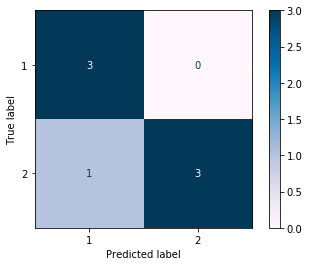

In [14]:
from sklearn.metrics import *
plot_confusion_matrix(model_KNN, X, y, cmap='PuBu')

In [15]:
z = np.array([[6,4],[0.7,0.2],[6666,6320]])

In [16]:
z=z.transpose()

In [17]:
z

array([[6.000e+00, 7.000e-01, 6.666e+03],
       [4.000e+00, 2.000e-01, 6.320e+03]])

In [18]:
z = scaler.transform(z) # 정규화

In [21]:
z

array([[ 0.23408229,  0.78446454,  0.42163875],
       [-0.58520574, -2.64756782,  0.1758604 ]])

In [19]:
pred_z = model_KNN.predict(z)

In [20]:
pred_z

array([2, 1], dtype=int64)